In [1]:
from entsoe import EntsoePandasClient
import pandas as pd
from pandas import DataFrame
from datetime import timedelta, date
import numpy as np
import os.path
import requests
import datetime

In [2]:
client = EntsoePandasClient(api_key = "9c51aa38-46cc-44ea-a3f0-dd69525abd80")

os.makedirs(os.getcwd() + "/" + "entsoe_transparency_data", exist_ok = True)

path = os.getcwd() + "/" + "entsoe_transparency_data"

In [3]:
#set your dates!
year_start = 2020
year_end = 2022
month_start = 1
month_end = 12
day_start = 1
day_end = 31 

country = "DE"

In [20]:
start = pd.Timestamp('2022-01-10')
end = pd.Timestamp('2022-04-13')

In [28]:
date_list = [(date.year, date.month) for date in pd.date_range(
    start=pd.Timestamp(start.year, start.month, 1), 
    end=pd.Timestamp(end.year, end.month+1, 1)-pd.Timedelta('1d'), 
    freq="m"
)]

In [29]:
date_list

[(2022, 1), (2022, 2), (2022, 3), (2022, 4)]

In [30]:
for date in date_list:
    print(date)
    d_start = pd.Timestamp(year=date[0], month=date[1], day=1, tz='Europe/Brussels')
    print(d_start)
    d_end = pd.Timestamp(year=date[0], month=date[1] + 1, day=1, tz='Europe/Brussels')
    print(d_end)
    #df = client.query_generation_per_plant(tso["{}".format(country)], start=start,end=end, psr_type=None)
    

(2022, 1)
2022-01-01 00:00:00+01:00
2022-02-01 00:00:00+01:00
(2022, 2)
2022-02-01 00:00:00+01:00
2022-03-01 00:00:00+01:00
(2022, 3)
2022-03-01 00:00:00+01:00
2022-04-01 00:00:00+02:00
(2022, 4)
2022-04-01 00:00:00+02:00
2022-05-01 00:00:00+02:00


In [4]:
# monthly_list is filled with dates in the format required for the queery
monthly_list = [] 
for year in list(range(year_start, year_end+1)):
    for month in range(month_start, month_end+1):
        if month == 12:
            days = pd.date_range(start="{}{}{}".format(year, "%.2d" % month, "%.2d" % day_start), 
                                 end="{}{}{}".format(year, "%.2d" % month, "%.2d" % day_end), freq="D").strftime("%Y%m%d")
        else:
            if day_end > 28:
                month_next = month+1
                days = pd.date_range(start="{}{}{}".format(year, "%.2d" % month, "%.2d" % day_start), 
                                     end="{}{}01".format(year, "%.2d" % month_next), freq="D")[:-1].strftime("%Y%m%d")
            else: 
                 days = pd.date_range(start="{}{}{}".format(year, "%.2d" % month, "%.2d" % day_start), 
                                      end="{}{}{}".format(year, "%.2d" % month, "%.2d" % day_end), freq="D").strftime("%Y%m%d")
        monthly_list.append(days)

In [5]:
monthly_list[:28]

[Index(['20200101', '20200102', '20200103', '20200104', '20200105', '20200106',
        '20200107', '20200108', '20200109', '20200110', '20200111', '20200112',
        '20200113', '20200114', '20200115', '20200116', '20200117', '20200118',
        '20200119', '20200120', '20200121', '20200122', '20200123', '20200124',
        '20200125', '20200126', '20200127', '20200128', '20200129', '20200130',
        '20200131'],
       dtype='object'),
 Index(['20200201', '20200202', '20200203', '20200204', '20200205', '20200206',
        '20200207', '20200208', '20200209', '20200210', '20200211', '20200212',
        '20200213', '20200214', '20200215', '20200216', '20200217', '20200218',
        '20200219', '20200220', '20200221', '20200222', '20200223', '20200224',
        '20200225', '20200226', '20200227', '20200228', '20200229'],
       dtype='object'),
 Index(['20200301', '20200302', '20200303', '20200304', '20200305', '20200306',
        '20200307', '20200308', '20200309', '20200310', '20200

In [6]:
# get generation data for all plants of an tso
def get_generation_data_tso (country, step):
    for dates in monthly_list[step:step+1]:
        filename = dates[0][:-2]
        file_path = os.path.join(path, country, filename)
        if os.path.exists(file_path):
            print(filename + " already exists")
        else:
            print(filename)
            os.makedirs(str(path) + "/" + str(country), exist_ok = True)
            country_path = os.path.join(path, str(country))
            start = pd.Timestamp(dates[0], tz='Europe/Brussels')
            end = pd.Timestamp(dates[-1], tz='Europe/Brussels')
            df = client.query_generation_per_plant(tso["{}".format(country)], start=start,end=end, psr_type=None)
            df.to_pickle("{}/{}".format(country_path, filename))

In [11]:
def get_data(country, step):
    for dates in monthly_list[step:step+1]:
        filename = dates[0][:-2]
        file_path = os.path.join(path, filename)
        if os.path.exists(file_path):
            print(filename + " already exists")
        else:
            start = pd.Timestamp(dates[0], tz='Europe/Brussels')
            end = pd.Timestamp(dates[-1], tz='Europe/Brussels') + pd.Timedelta('1d')
            print(start)
            print(end)
            df = client.query_generation(country, start=start, end=end, psr_type=None)
            df.to_pickle("{}".format(file_path))

In [12]:
for step in range(len(monthly_list[:28])):
    try:
        print(step)
        get_data(country, step)
    except requests.exceptions.ConnectionError:
        print('failed')
        pass  

0
2020-01-01 00:00:00+01:00
2020-01-31 00:00:00+01:00


C:\Users\olive\miniconda3\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(
C:\Users\olive\miniconda3\lib\site-packages\entsoe\parsers.py:631: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  index = pd.date_range(start=start, end=end, freq=delta, closed='left')
C:\Users\olive\miniconda3\lib\site-packages\entsoe\parsers.py:631: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  index = pd.date_range(start=start, end=end, freq=delta, closed='left')
C:\Users\olive\miniconda3\lib\site-packages\entsoe\parsers.py:

C:\Users\olive\miniconda3\lib\site-packages\entsoe\parsers.py:135: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  series = series.append(ts)
C:\Users\olive\miniconda3\lib\site-packages\entsoe\parsers.py:631: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  index = pd.date_range(start=start, end=end, freq=delta, closed='left')
C:\Users\olive\miniconda3\lib\site-packages\entsoe\parsers.py:135: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  series = series.append(ts)
C:\Users\olive\miniconda3\lib\site-packages\entsoe\parsers.py:631: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  index = pd.date_range(start=start, end=end, freq=delta, closed='left')
C:\Users\olive\miniconda3\lib\site-packages\entsoe\parsers.py:135: FutureWarning: The series.append method is deprec

C:\Users\olive\miniconda3\lib\site-packages\entsoe\parsers.py:135: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  series = series.append(ts)
C:\Users\olive\miniconda3\lib\site-packages\entsoe\parsers.py:631: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  index = pd.date_range(start=start, end=end, freq=delta, closed='left')
C:\Users\olive\miniconda3\lib\site-packages\entsoe\parsers.py:135: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  series = series.append(ts)
C:\Users\olive\miniconda3\lib\site-packages\entsoe\parsers.py:631: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  index = pd.date_range(start=start, end=end, freq=delta, closed='left')
C:\Users\olive\miniconda3\lib\site-packages\entsoe\parsers.py:135: FutureWarning: The series.append method is deprec

C:\Users\olive\miniconda3\lib\site-packages\entsoe\parsers.py:631: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  index = pd.date_range(start=start, end=end, freq=delta, closed='left')
C:\Users\olive\miniconda3\lib\site-packages\entsoe\parsers.py:135: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  series = series.append(ts)
C:\Users\olive\miniconda3\lib\site-packages\entsoe\parsers.py:631: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  index = pd.date_range(start=start, end=end, freq=delta, closed='left')
C:\Users\olive\miniconda3\lib\site-packages\entsoe\parsers.py:135: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  series = series.append(ts)
C:\Users\olive\miniconda3\lib\site-packages\entsoe\parsers.py:631: FutureWarning: Argument `closed` is deprecated in

1
202002 already exists
2
202003 already exists
3
202004 already exists
4
202005 already exists
5
202006 already exists
6
202007 already exists
7
202008 already exists
8
202009 already exists
9
202010 already exists
10
202011 already exists
11
202012 already exists
12
202101 already exists
13
202102 already exists
14
202103 already exists
15
202104 already exists
16
202105 already exists
17
202106 already exists
18
202107 already exists
19
202108 already exists
20
202109 already exists
21
202110 already exists
22
202111 already exists
23
202112 already exists
24
202201 already exists
25
202202 already exists
26
202203 already exists
27
202204 already exists


In [9]:
# read pickles and save to df
def get_pickles(country):
    df_list = []
    for step in monthly_list[:28]:
        ts = pd.read_pickle("{}/{}".format(path, step[0][:-2]))
        df_list.append(ts)
    df = pd.concat(df_list, axis = 0)
    return df    

In [10]:
df = get_pickles(country)
df

Biomass Fossil Brown coal/Lignite  \
                          Actual Aggregated         Actual Aggregated   
2020-01-01 00:00:00+01:00            4865.0                    9280.0   
2020-01-01 00:15:00+01:00            4870.0                    9304.0   
2020-01-01 00:30:00+01:00            4859.0                    9336.0   
2020-01-01 00:45:00+01:00            4852.0                    9348.0   
2020-01-01 01:00:00+01:00            4851.0                    9408.0   
...                                     ...                       ...   
2022-04-12 12:00:00+02:00            4293.0                   11103.0   
2022-04-12 12:15:00+02:00            4297.0                   10654.0   
2022-04-12 12:30:00+02:00            4294.0                   10504.0   
2022-04-12 12:45:00+02:00               NaN                   10465.0   
2022-04-12 13:00:00+02:00               NaN                       NaN   

                                 Fossil Gas  Fossil Hard coal  \
                          Actual Aggregated Actual Aggregated   
2020-01-01 00:00:00+01:00            5077.0            1985.0   
2020-01-01 00:15:00+01:00            4950.0            1948.0   
2020-01-01 00:30:00+01:00            4857.0            1942.0   
2020-01-01 00:45:00+01:00            4782.0            1972.0   
2020-01-01 01:00:00+01:00            4587.0            1936.0   
...                                     ...               ...   
2022-04-12 12:00:00+02:00            3511.0            5530.0   
2022-04-12 12:15:00+02:00            3271.0            5540.0   
2022-04-12 12:30:00+02:00            3219.0            5533.0   
2022-04-12 12:45:00+02:00            3230.0            5560.0   
2022-04-12 13:00:00+02:00               NaN               NaN   

                                 Fossil Oil                     \
                          Actual Aggregated Actual Consumption   
2020-01-01 00:00:00+01:00             454.0                NaN   
2020-01-01 00:15:00+01:00             454.0                NaN   
2020-01-01 00:30:00+01:00             454.0                NaN   
2020-01-01 00:45:00+01:00             454.0                NaN   
2020-01-01 01:00:00+01:00             454.0                NaN   
...                                     ...                ...   
2022-04-12 12:00:00+02:00             293.0                NaN   
2022-04-12 12:15:00+02:00             293.0                NaN   
2022-04-12 12:30:00+02:00             293.0                NaN   
2022-04-12 12:45:00+02:00               NaN                NaN   
2022-04-12 13:00:00+02:00               NaN                NaN   

                                 Geothermal Hydro Pumped Storage  \
                          Actual Aggregated    Actual Aggregated   
2020-01-01 00:00:00+01:00              30.0               1064.0   
2020-01-01 00:15:00+01:00              30.0                509.0   
2020-01-01 00:30:00+01:00              30.0                409.0   
2020-01-01 00:45:00+01:00              30.0                211.0   
2020-01-01 01:00:00+01:00              30.0                 91.0   
...                                     ...                  ...   
2022-04-12 12:00:00+02:00              21.0                 11.0   
2022-04-12 12:15:00+02:00              21.0                 54.0   
2022-04-12 12:30:00+02:00              21.0                 30.0   
2022-04-12 12:45:00+02:00               NaN                  9.0   
2022-04-12 13:00:00+02:00               NaN                  NaN   

                                             Hydro Run-of-river and poundage  \
                          Actual Consumption               Actual Aggregated   
2020-01-01 00:00:00+01:00              196.0                          1320.0   
2020-01-01 00:15:00+01:00              264.0                          1316.0   
2020-01-01 00:30:00+01:00              387.0                          1311.0   
2020-01-01 00:45:00+01:00              517.0                          1311.0   
2020-01-01 01:00

In [61]:
ser = df.resample('1d').sum()['Fossil Gas', 'Actual Aggregated'] / 4
ser.name = 'electricity_from_gas'
ser = ser.tz_localize(None)
ser.to_csv('../data/electricity_from_gas.csv')

<AxesSubplot:>

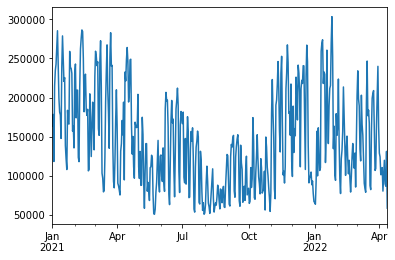

In [63]:
ser[ser.index.year>2020].plot()